# WELCOME TO THE NOTEBOOK
------------------

### Importing the Modules

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string
#for text analysis
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')

# for visuals
from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Importing the Dataset

In [ ]:
df = pd.read_csv('socialism-tweets.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



,Datetime,Tweet Id,Text,Username,lang
0,2021-08-02 23:59:54+00:00,1422346450772631553,@whoistaneesh @gilb3rt101 @b3ckton ratio then,maxthesnowflak3,en
1,2021-08-02 23:59:44+00:00,1422346408934453252,@KelbPanthera @Timcast Interesting🤔 I’m having...,AliceOrtegaR,en
2,2021-08-02 23:59:39+00:00,1422346389053378567,@louie_jackjr @notcrypticno yeah and either wa...,maxthesnowflak3,en
3,2021-08-02 23:59:33+00:00,1422346361140400129,@NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...,howell_mg,en
4,2021-08-02 23:59:31+00:00,1422346353183690758,@Azure_Husky Tell them they're wonderful,ExpAllison,en


let's check the shape of the dataframe

In [ ]:
df.shape

(789504, 5)

let's select the needed columns for our project

In [ ]:
needed_cols = ['Username','Datetime','Text']
df = df[needed_cols]
df.head()

,Username,Datetime,Text
0,maxthesnowflak3,2021-08-02 23:59:54+00:00,@whoistaneesh @gilb3rt101 @b3ckton ratio then
1,AliceOrtegaR,2021-08-02 23:59:44+00:00,@KelbPanthera @Timcast Interesting🤔 I’m having...
2,maxthesnowflak3,2021-08-02 23:59:39+00:00,@louie_jackjr @notcrypticno yeah and either wa...
3,howell_mg,2021-08-02 23:59:33+00:00,@NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...
4,ExpAllison,2021-08-02 23:59:31+00:00,@Azure_Husky Tell them they're wonderful


change the type of some columns

In [ ]:
df.Username = df.Username.astype('category')
df.Username = df.Username.cat.codes
df.head()

,Username,Datetime,Text
0,260840,2021-08-02 23:59:54+00:00,@whoistaneesh @gilb3rt101 @b3ckton ratio then
1,8840,2021-08-02 23:59:44+00:00,@KelbPanthera @Timcast Interesting🤔 I’m having...
2,260840,2021-08-02 23:59:39+00:00,@louie_jackjr @notcrypticno yeah and either wa...
3,233390,2021-08-02 23:59:33+00:00,@NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...
4,55877,2021-08-02 23:59:31+00:00,@Azure_Husky Tell them they're wonderful


In [ ]:
df.Datetime = pd.to_datetime(df.Datetime, infer_datetime_format=True, errors='coerce').dt.date
df.head()

,Username,Datetime,Text
0,260840,2021-08-02,@whoistaneesh @gilb3rt101 @b3ckton ratio then
1,8840,2021-08-02,@KelbPanthera @Timcast Interesting🤔 I’m having...
2,260840,2021-08-02,@louie_jackjr @notcrypticno yeah and either wa...
3,233390,2021-08-02,@NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...
4,55877,2021-08-02,@Azure_Husky Tell them they're wonderful


### Picking out the tweet texts

In [ ]:
texts = df['Text']
texts

0             @whoistaneesh @gilb3rt101 @b3ckton ratio then
1         @KelbPanthera @Timcast Interesting🤔 I’m having...
2         @louie_jackjr @notcrypticno yeah and either wa...
3         @NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...
4                  @Azure_Husky Tell them they're wonderful
                                ...                        
789499    The Ancient Socialists and Anarchists | Histor...
789500    @Chesschick01 "Since he being the torchbearer ...
789501    @peterdmccann @angela_feeney And all the while...
789502    @angrybklynmom @reopenpa The closest to social...
789503    @FoxNews CRAZY!!! The beginning of socialism i...
Name: Text, Length: 789504, dtype: object

### Removing URLs from tweets

In [ ]:
remove_urls = lambda x: re.sub('https\S+','', str(x))
texts_lr = texts.apply(remove_urls)
texts_lr

0             @whoistaneesh @gilb3rt101 @b3ckton ratio then
1         @KelbPanthera @Timcast Interesting🤔 I’m having...
2         @louie_jackjr @notcrypticno yeah and either wa...
3         @NetBoyRick2pt0 @aaronjmate @PushbackShow Oh m...
4                  @Azure_Husky Tell them they're wonderful
                                ...                        
789499    The Ancient Socialists and Anarchists | Histor...
789500    @Chesschick01 "Since he being the torchbearer ...
789501    @peterdmccann @angela_feeney And all the while...
789502    @angrybklynmom @reopenpa The closest to social...
789503    @FoxNews CRAZY!!! The beginning of socialism i...
Name: Text, Length: 789504, dtype: object

In [ ]:
remove_mentions = lambda x: re.sub(r"(?:\@|https?\://)\S+", "", str(x))
texts_lr = texts.apply(remove_mentions)
texts_lr

0                                                ratio then
1           Interesting🤔 I’m having trouble understandin...
2           yeah and either way say things go completely...
3            Oh my God it's like talking to a concrete b...
4                               Tell them they're wonderful
                                ...                        
789499    The Ancient Socialists and Anarchists | Histor...
789500     "Since he being the torchbearer of socialism,...
789501      And all the while kids starve , our NHS disa...
789502      The closest to socialism / Marxism. Makes se...
789503      CRAZY!!! The beginning of socialism is upon us!
Name: Text, Length: 789504, dtype: object

### Converting all tweets to lowercase

In [ ]:
to_lower = lambda x: x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0                                                ratio then
1           interesting🤔 i’m having trouble understandin...
2           yeah and either way say things go completely...
3            oh my god it's like talking to a concrete b...
4                               tell them they're wonderful
                                ...                        
789499    the ancient socialists and anarchists | histor...
789500     "since he being the torchbearer of socialism,...
789501      and all the while kids starve , our nhs disa...
789502      the closest to socialism / marxism. makes se...
789503      crazy!!! the beginning of socialism is upon us!
Name: Text, Length: 789504, dtype: object

### Removing punctuations

In [ ]:
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0                                                ratio then
1           interesting🤔 i’m having trouble understandin...
2           yeah and either way say things go completely...
3            oh my god its like talking to a concrete bl...
4                                tell them theyre wonderful
                                ...                        
789499    the ancient socialists and anarchists  history...
789500     since he being the torchbearer of socialism h...
789501      and all the while kids starve  our nhs disap...
789502      the closest to socialism  marxism makes sens...
789503          crazy the beginning of socialism is upon us
Name: Text, Length: 789504, dtype: object

### Removing stopwords

In [ ]:
more_words = ['socialism','communism', '#leftism', '#leftist', 'leftist','#liberal', 'liberals', '#socialism', 'anticapitalism','actually','also','amp','don’t','dont','even','get','im','it’s','know','like','make','many','much','need','never','one','say','see','socialist','thats','think','time','us','want','way','well','work','would',''
]
stop_words = set(stopwords.words('english'))
stop_words.update(more_words)
stop_words

remove_stop_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_stop_words)
texts_lr_lc_np_ns

0                                                     ratio
1         interesting🤔 i’m trouble understanding vaush p...
2         yeah either things go completely south end tra...
3         oh god talking concrete block example meddled ...
4                                     tell theyre wonderful
                                ...                        
789499            ancient socialists anarchists history via
789500    since torchbearer tomb must management century...
789501    kids starve nhs disappears people dying hope d...
789502    closest marxism makes sense totalitarian autho...
789503                                 crazy beginning upon
Name: Text, Length: 789504, dtype: object

### let's create a big list of words out of all the tweets 

In [ ]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]

In [ ]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']
words_df.head()


px.bar(words_df, x='word', y='freq', title="Most Common Words")

In [ ]:
texts_lr_lc_np_ns

0                                                     ratio
1         interesting🤔 i’m trouble understanding vaush p...
2         yeah either things go completely south end tra...
3         oh god talking concrete block example meddled ...
4                                     tell theyre wonderful
                                ...                        
789499            ancient socialists anarchists history via
789500    since torchbearer tomb must management century...
789501    kids starve nhs disappears people dying hope d...
789502    closest marxism makes sense totalitarian autho...
789503                                 crazy beginning upon
Name: Text, Length: 789504, dtype: object

### put the Cleaned text in main dataframe

In [ ]:
df.Text = texts_lr_lc_np_ns
df.head()

,Username,Datetime,Text
0,260840,2021-08-02,ratio
1,8840,2021-08-02,interesting🤔 i’m trouble understanding vaush p...
2,260840,2021-08-02,yeah either things go completely south end tra...
3,233390,2021-08-02,oh god talking concrete block example meddled ...
4,55877,2021-08-02,tell theyre wonderful


# Sentiment Analysis 

Getting the polarity scores for each tweet

In [ ]:
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiment_scores = df.Text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'comp...
2         {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...
3         {'neg': 0.41, 'neu': 0.502, 'pos': 0.088, 'com...
4         {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...
                                ...                        
789499    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
789500    {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...
789501    {'neg': 0.39, 'neu': 0.422, 'pos': 0.188, 'com...
789502    {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...
789503    {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...
Name: Text, Length: 789504, dtype: object

In [ ]:
sentiment_df = pd.DataFrame(data=list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.197,0.803,0.000,-0.4019
2,0.000,0.855,0.145,0.2960
3,0.410,0.502,0.088,-0.7717
4,0.000,0.351,0.649,0.5719


### Labeling the scores based on the compound polarity value

In [ ]:
labelize = lambda x: 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,1.000,0.000,0.0000,neutral
1,0.197,0.803,0.000,-0.4019,negative
2,0.000,0.855,0.145,0.2960,positive
3,0.410,0.502,0.088,-0.7717,negative
4,0.000,0.351,0.649,0.5719,positive


### let's join two dataframes

In [ ]:
data= df.join(sentiment_df.label)
data.head()

,Username,Datetime,Text,label
0,260840,2021-08-02,ratio,neutral
1,8840,2021-08-02,interesting🤔 i’m trouble understanding vaush p...,negative
2,260840,2021-08-02,yeah either things go completely south end tra...,positive
3,233390,2021-08-02,oh god talking concrete block example meddled ...,negative
4,55877,2021-08-02,tell theyre wonderful,positive


### Plotting the sentiment score counts

In [ ]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,322420
1,negative,278004
2,neutral,189080


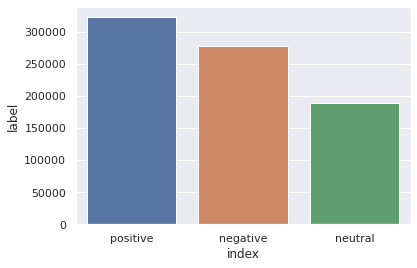

In [ ]:
sns.barplot(x='index', y='label', data=counts_df)

In [ ]:
data.head()

,Username,Datetime,Text,label
0,260840,2021-08-02,ratio,neutral
1,8840,2021-08-02,interesting🤔 i’m trouble understanding vaush p...,negative
2,260840,2021-08-02,yeah either things go completely south end tra...,positive
3,233390,2021-08-02,oh god talking concrete block example meddled ...,negative
4,55877,2021-08-02,tell theyre wonderful,positive


In [ ]:
data_agg = data[['Username','Datetime','label']].groupby(['Datetime', 'label']).count().reset_index()
data_agg.head()
data_agg.columns =['date','label','counts']
data_agg.head()

,date,label,counts
0,2021-03-24,negative,972
1,2021-03-24,neutral,604
2,2021-03-24,positive,1018
3,2021-03-25,negative,2117
4,2021-03-25,neutral,1428


In [ ]:
px.line(data_agg, x='date', y='counts', color='label', title ='Daily Tweets Sentimental Analysis')